Lecture 25 + Part of the challenge.

# Welcome to the Future

Get ready to predict the future! But first, let’s recap what you’ve already done. Using APIs and statistical functions, you can now make short-term predictions about the performance of a stock. You can also measure uncertain outcomes. But you still need to figure out two issues.

First, as we try to predict further into the future, measuring the potential performance of an asset becomes more difficult. Second, quantifying the long-term future performance of numerous assets proves challenging. This is because each asset has its own range of possible outcomes, which complicates the analysis.

Fortunately, tools exist to account for variations in the performance of a portfolio. One such tool is the Monte Carlo simulation. Analysts use this tool to generate a range of possible outcomes for a portfolio with a high degree of confidence. In this lesson, you’ll run Monte Carlo simulations to forecast the long-term performance of both individual stocks and a portfolio. Being able to predict the future in this way will give you an edge as a fintech professional and as a financial analyst.

Let’s dive into the future—the world of Monte Carlo.

# Predicting the Future with Monte Carlo Simulations.


When we analyze financial data, we typically summarize historical data to predict future outcomes. However, these predictions become less accurate the further we project into the future or the more assets that we analyze. As the scope of the analysis widens, the chance for randomness and variability increases.

A simulation is a running instance of a model, or computer program, that imitates an existing process or system. With simulations, analysts can examine the possible outcomes of real-world scenarios in an environment that’s safe and efficient. For example, examining the future performance of a stock in a simulation means that no one loses any real money. Analysts can also change important variables—economic conditions, overall market performance, and length of time—that influence a simulation’s results.

In computer programming, an instance refers to an occurrence of a running program. For example, running a Monte Carlo instance means the same thing as running a Monte Carlo simulation.

Monte Carlo simulations are designed to solve issues with predicting future outcomes by modeling the effects of uncertainty over time. People can use Monte Carlo simulations to predict outcomes across industries. However, they’ll prove particularly useful for you as a fintech professional for forecasting stock and portfolio performance.

To build and analyze these models, we need to apply the concepts of probability distribution and portfolio forecasting. We already covered probability distribution, so let’s find out more about portfolio forecasting.

# What’s Portfolio Forecasting?

Portfolio forecasting is the process of simulating the future performance of a portfolio and trying to analyze its most probable outcome. In this lesson, you’ll estimate the range of potential cumulative returns for a portfolio and the corresponding probabilities. This will help you analyze the potential of the portfolio’s performance to deviate from the expected result.

----------------------------------------------------------------------------------------------------------------------------
## Reminder.

The cumulative return is the total change in the investment price over time. To calculate the cumulative return, you first sum the individual daily performance changes in a portfolio over the time period. You then multiply that value by the price of the portfolio at the start of the same time period.

-------------------------------------------------------------------------------------------------------------------------------

# Implementing Monte Carlo Simulations in Python.

To simulate portfolio performance by using Monte Carlo and Python, we need two things:

    1 - Historical pricing data for the assets in the portfolio, which the simulation uses to generate its predictions.

    2 - A simulation framework in which to run the Monte Carlo simulation.
    
We can get the historical data in one of two ways. We can read a CSV file into a Pandas DataFrame by using the `read_csv`function. Or, we can make an API call. In this lesson, we’ll use the Alpaca SDK to make an Alpaca API call to get the historical financial data that we need.

For the Monte Carlo simulation framework, you’ll use a Python library named MCForecastTools. Unlike the other libraries that you’ve used so far, this library isn’t part of the Conda development environment. Rather, it exists as a Python file named `MCForecastTools.py`in the same folder as the Jupyter notebook that you’re working in. This file contains all the logic, in the form of Python code, that you need to run the Monte Carlo simulation.

We need to import `MCForecastTools.py`into the notebook to access it and therefore to run the simulations. The best way to discover how this library works is to do a Monte Carlo simulation!


# Example Time.
# Using Monte Carlo with the MCForecastTools Library

For our first Monte Carlo simulation, we’ll focus on Microsoft (MSFT) and Coca-Cola (KO) stock. If we invest $10,000 in these stocks today, how much will our portfolio be worth in 5 years or even in 10? Let's find out.

# Get Historical Data with the Alpaca API.
To estimate what the value of a portfolio will be in three years, we’ll get three years of historical price data. To do this, we’ll make an API call to Alpaca via its SDK. First, we complete the following steps in a Jupyter notebook:

1 - Import the required libraries and dependencies, including os, dotenv, Pandas, and alpaca_trade_api.

2 - Set up the Alpaca API and secret keys as environment variables in an environment file (.env), and then import them into the Jupyter notebook.

3 - Set up the Alpaca API RESTobject. Include the Alpaca API key, secret key, and version number in this object.

Here are the three steps in code:




In [ ]:
# Import the required libraries and dependencies
import os
from dotenv import load_dotenv
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key )

# Create the Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version = "v2"
)

Next, we get the historical price data of Microsoft and Coca-Cola over the past three years. To do this, we call the Alpaca `get_barset` function, as the following code shows:

In [ ]:
# Set the ticker information
tickers = ["MSFT","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

# Get 3 years’ worth of historical price data for Microsoft and Coca-Cola
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

# Review the first 5 rows of the DataFrame
prices_df.head()

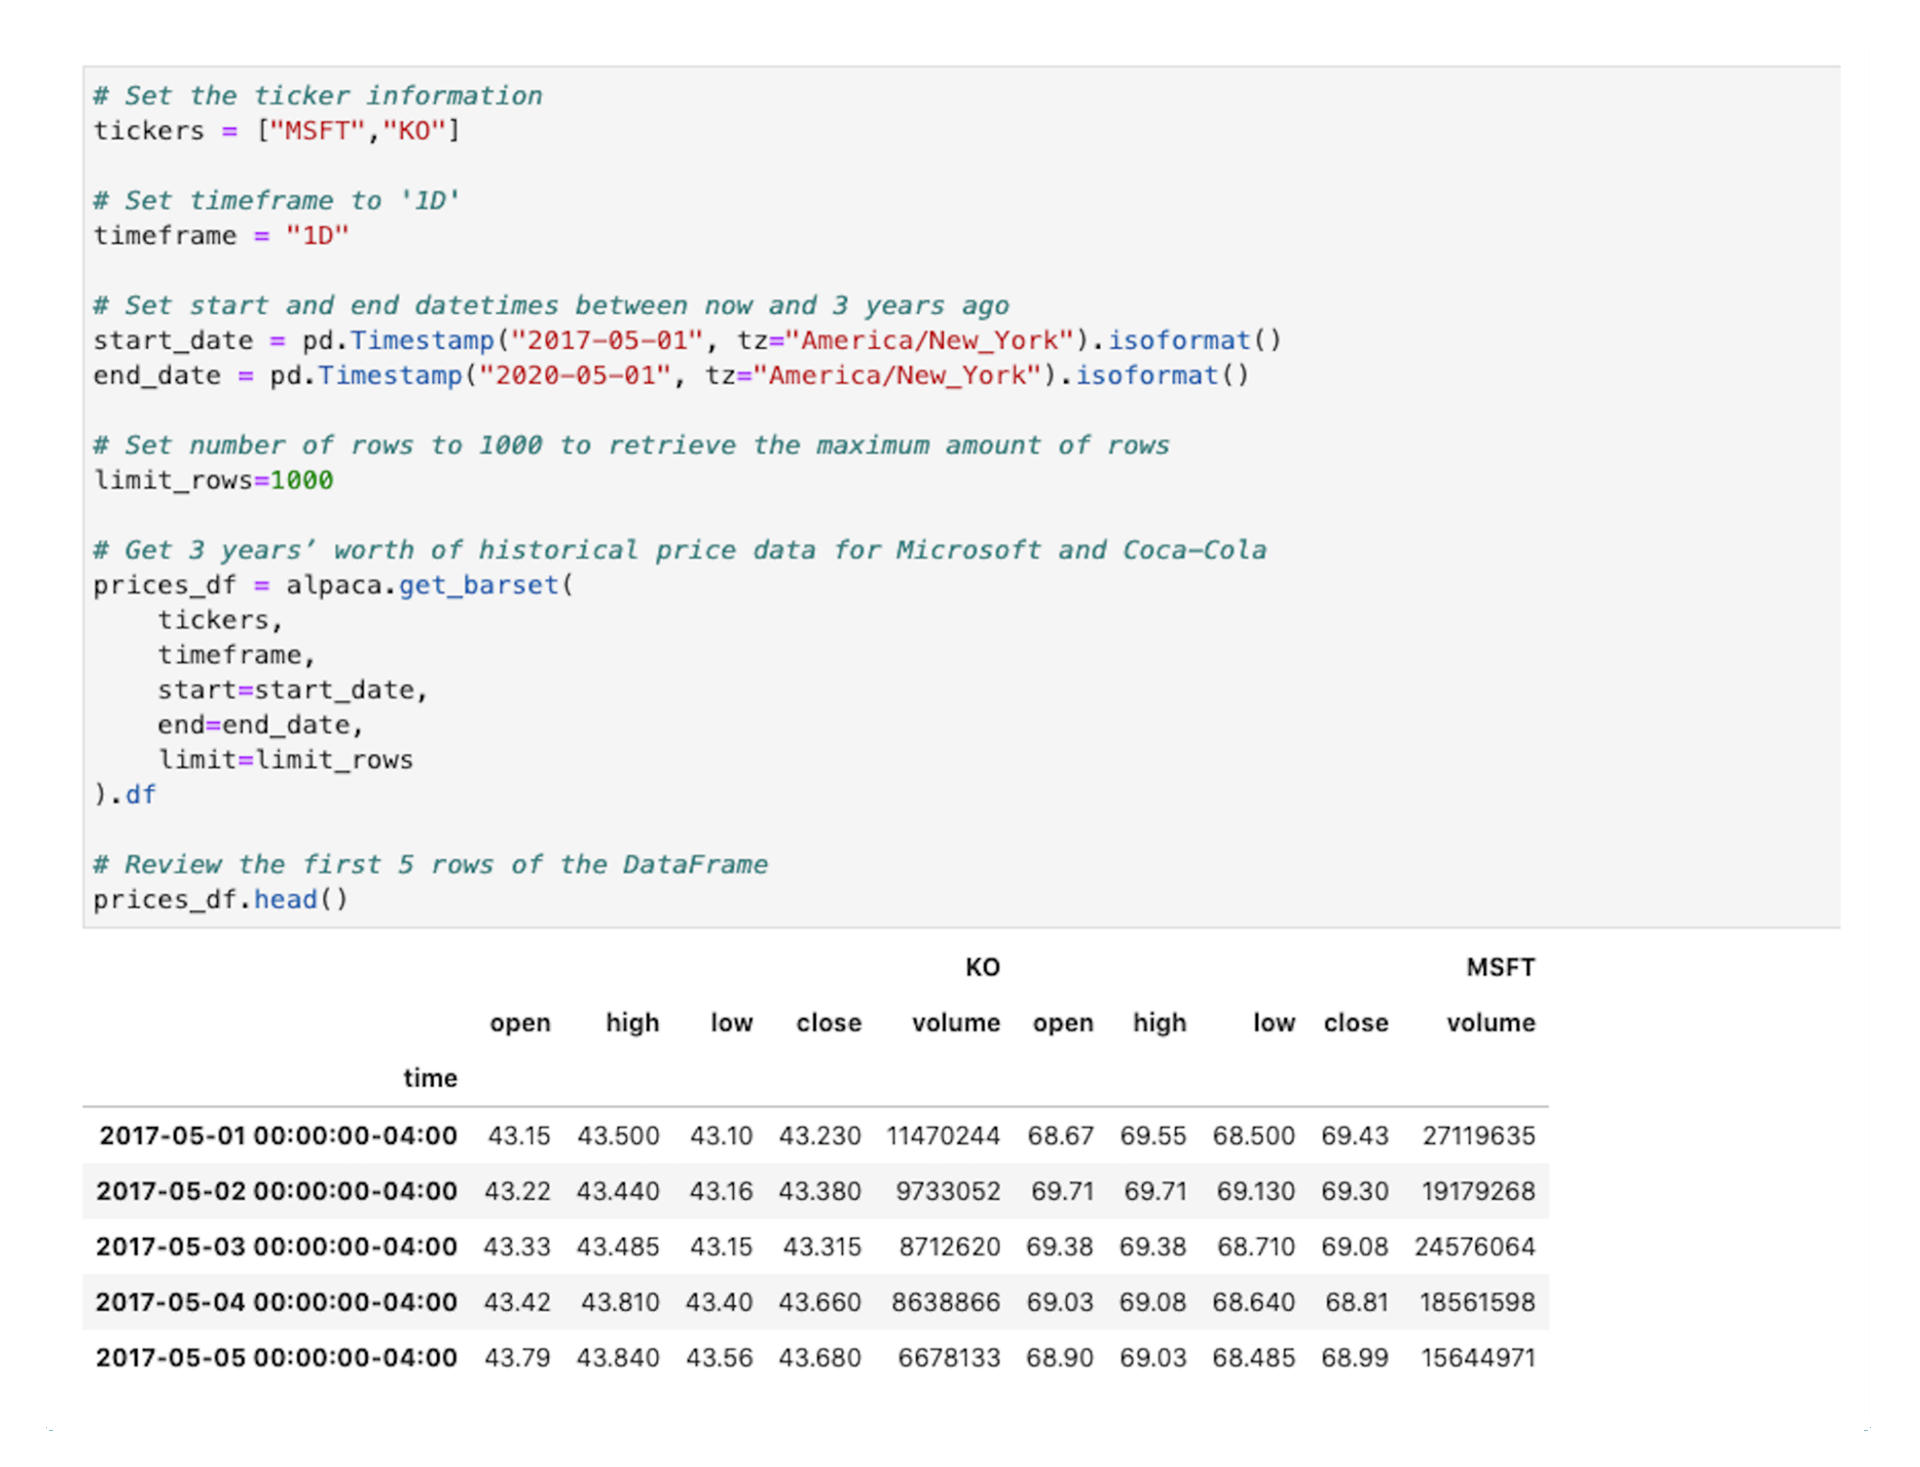

Now that we have our historical data in a DataFrame, we can build the Monte Carlo simulation.

# Build a Monte Carlo Simulation.

Let's review the documentation for the MCSimulation module of the MCForecastTools library.

In [1]:
# Import the MCSimulation module from the MCForecastTools library file
from MCForecastTools import MCSimulation

# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

- `portfolio_data`: This is the Pandas DataFrame that contains historical stock data from our potential stock portfolio.

- `weights`: This is the percentage that each individual asset makes up in the total portfolio. The weights of the assets must total 100%. For example, in our two-stock portfolio, KO makes up 60% of the portfolio, and MSFT makes up 40%. For the Monte Carlo simulation, we express this as`weights = [.60, .40].` The MCSimulation module thus assumes that $6,000 of a $10,000 investment goes to Coca-Cola stock, and $4,000 goes to Microsoft stock.

- `num_simulation`: This is the number of simulated samples that we want to create. For this example, we should try to simulate a minimum of 500 samples. (However, if you have a more powerful computer and more time, you could try to simulate 1,000 samples. The more samples that run, the more reliable the analysis becomes.)

- `num_trading_days`: This is the number of trading days to simulate. For example, if we want to simulate the stock price returns after five years, we’ll need to multiply 252 (the number of trading days in a year) by 5. We express the syntax as the number of trading days times the number of years (252 * 5).



### for example.
With these parameters in mind, we can create our first instance of MCSimulation by using a 60/40 split for the weight of our assets. We’ll use 60% for Coca-Cola stock and 40% for Microsoft stock. The instance will run 500 simulations and generate the potential return of the portfolio in five years.

The following code configures the Monte Carlo simulation:

In [ ]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [.60,.40],
  num_simulation = 500,
  num_trading_days = 252*5
)

The preceding code generates a new DataFrame that has the same name as the one that we assigned to the simulation. In this case, the name is `MC_fiveyear`  To review the DataFrame, we call the `portfolio_data` function along with the head function, as the following code shows:

In [ ]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

The resulting DataFrame automatically includes a `daily_return` column for each stock that calculates the percentage of change in the closing prices. The `daily_return` column contains the normally distributed variables that we’ll use as input for the Monte Carlo simulation. The following image shows the DataFrame:

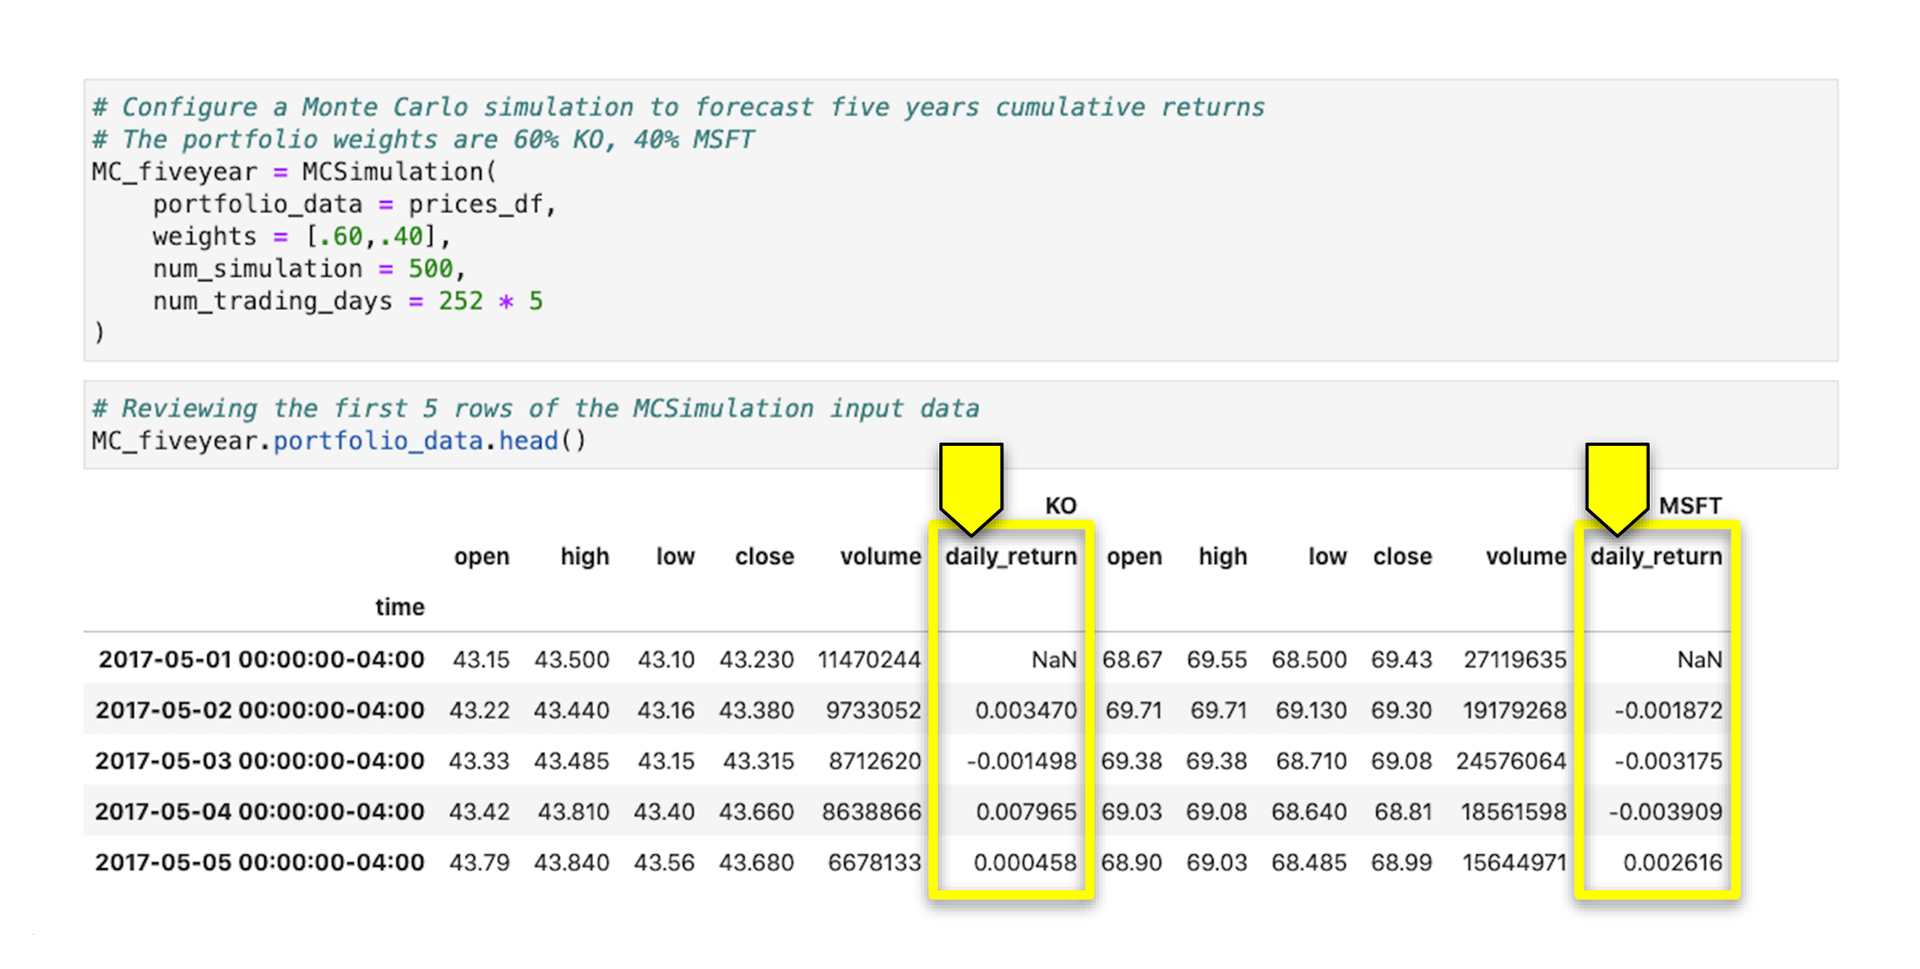

With all the required information in place, it’s now time to run the Monte Carlo simulation.

# Run the Monte Carlo Simulation.
With the `MCSimulation instance`, we can run the Monte Carlo simulation by using the `calc_cumulative_return` function, as the following code shows:


In [ ]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

The following image shows how the simulation appears once it finishes running in the notebook:

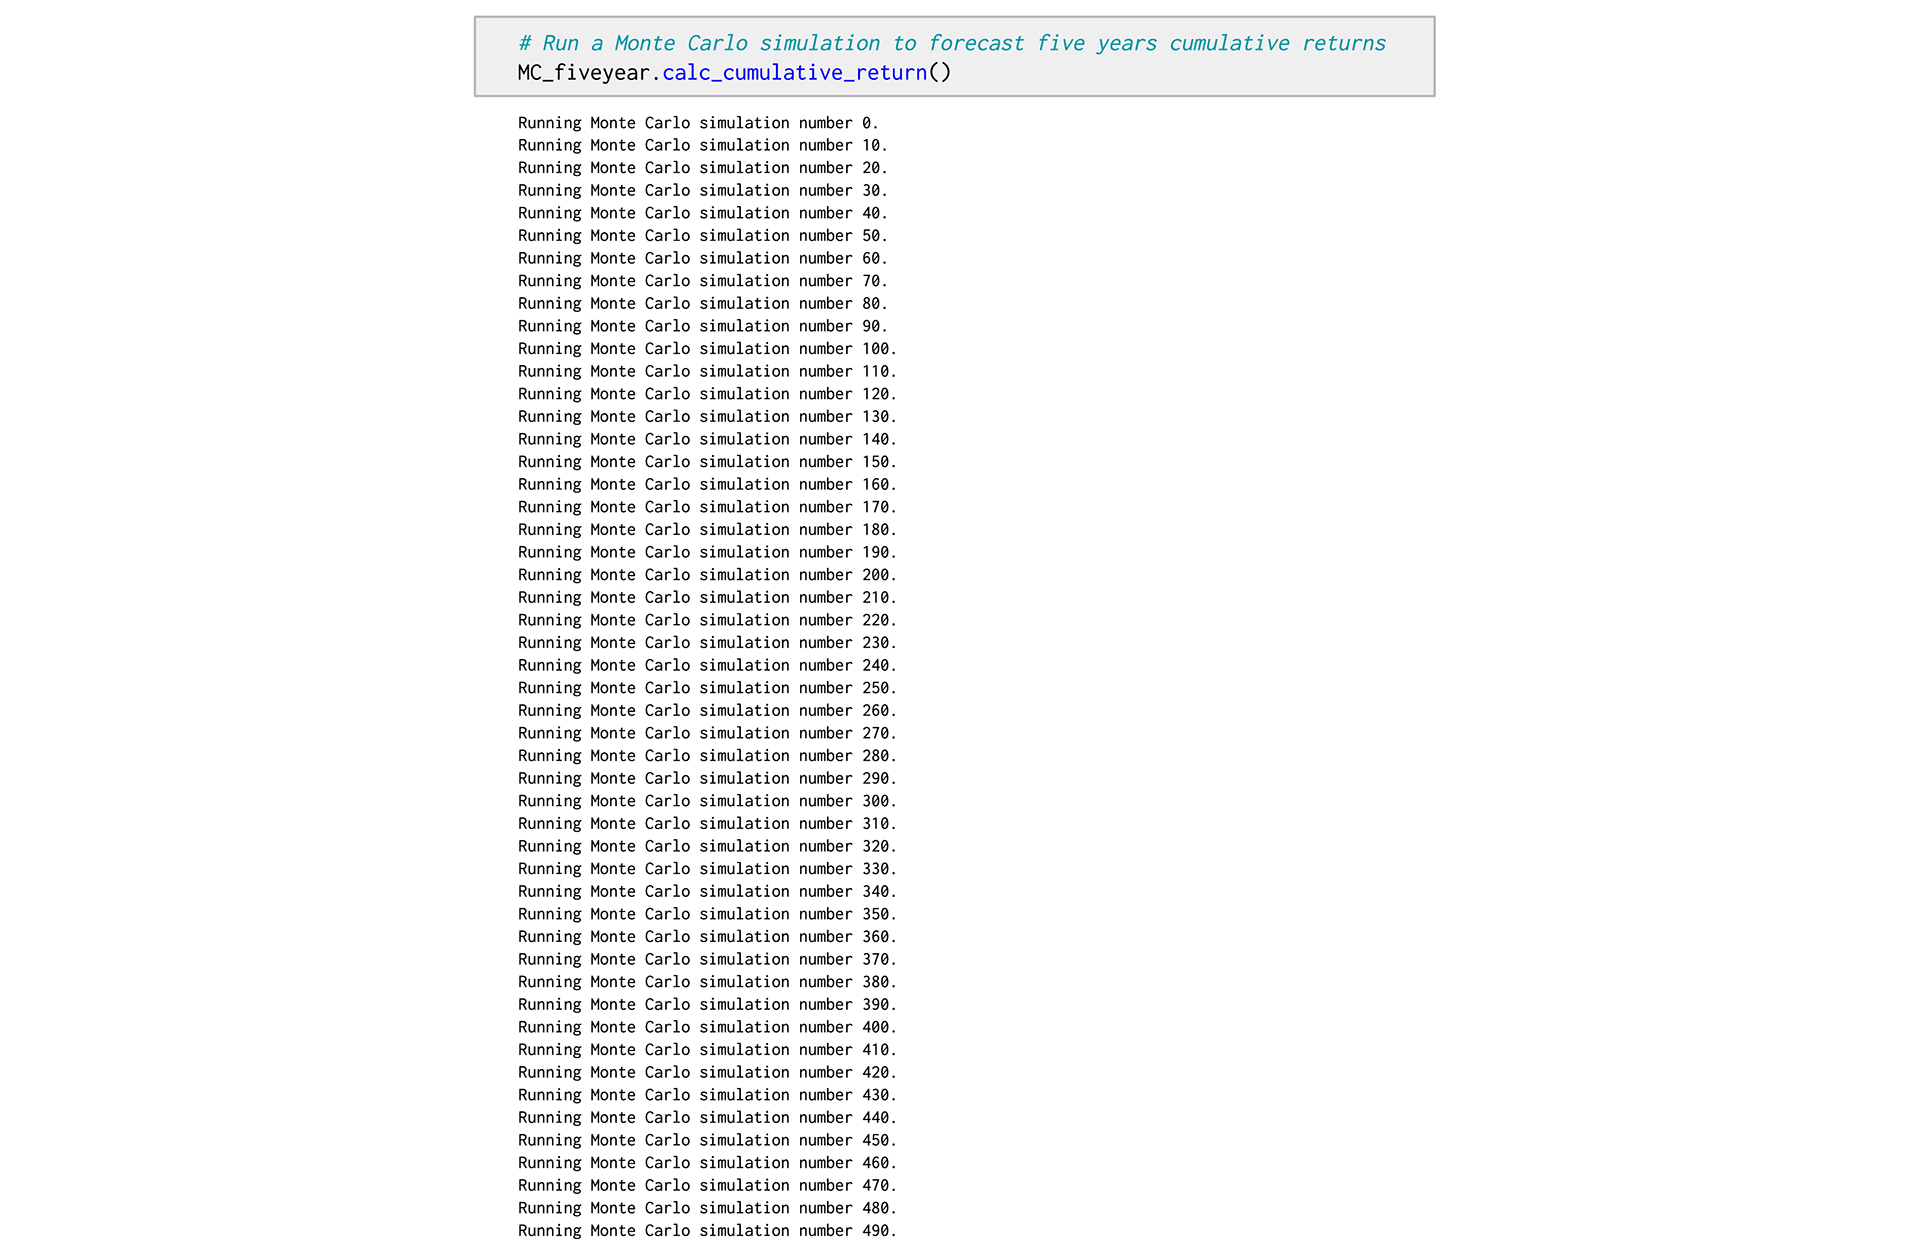

Notice that the instance generates a new output line for every 10 of the 500 simulations that run. The instance keeps generating output lines until it completes.

Also, notice that running the simulations creates a new DataFrame, as the following image shows:

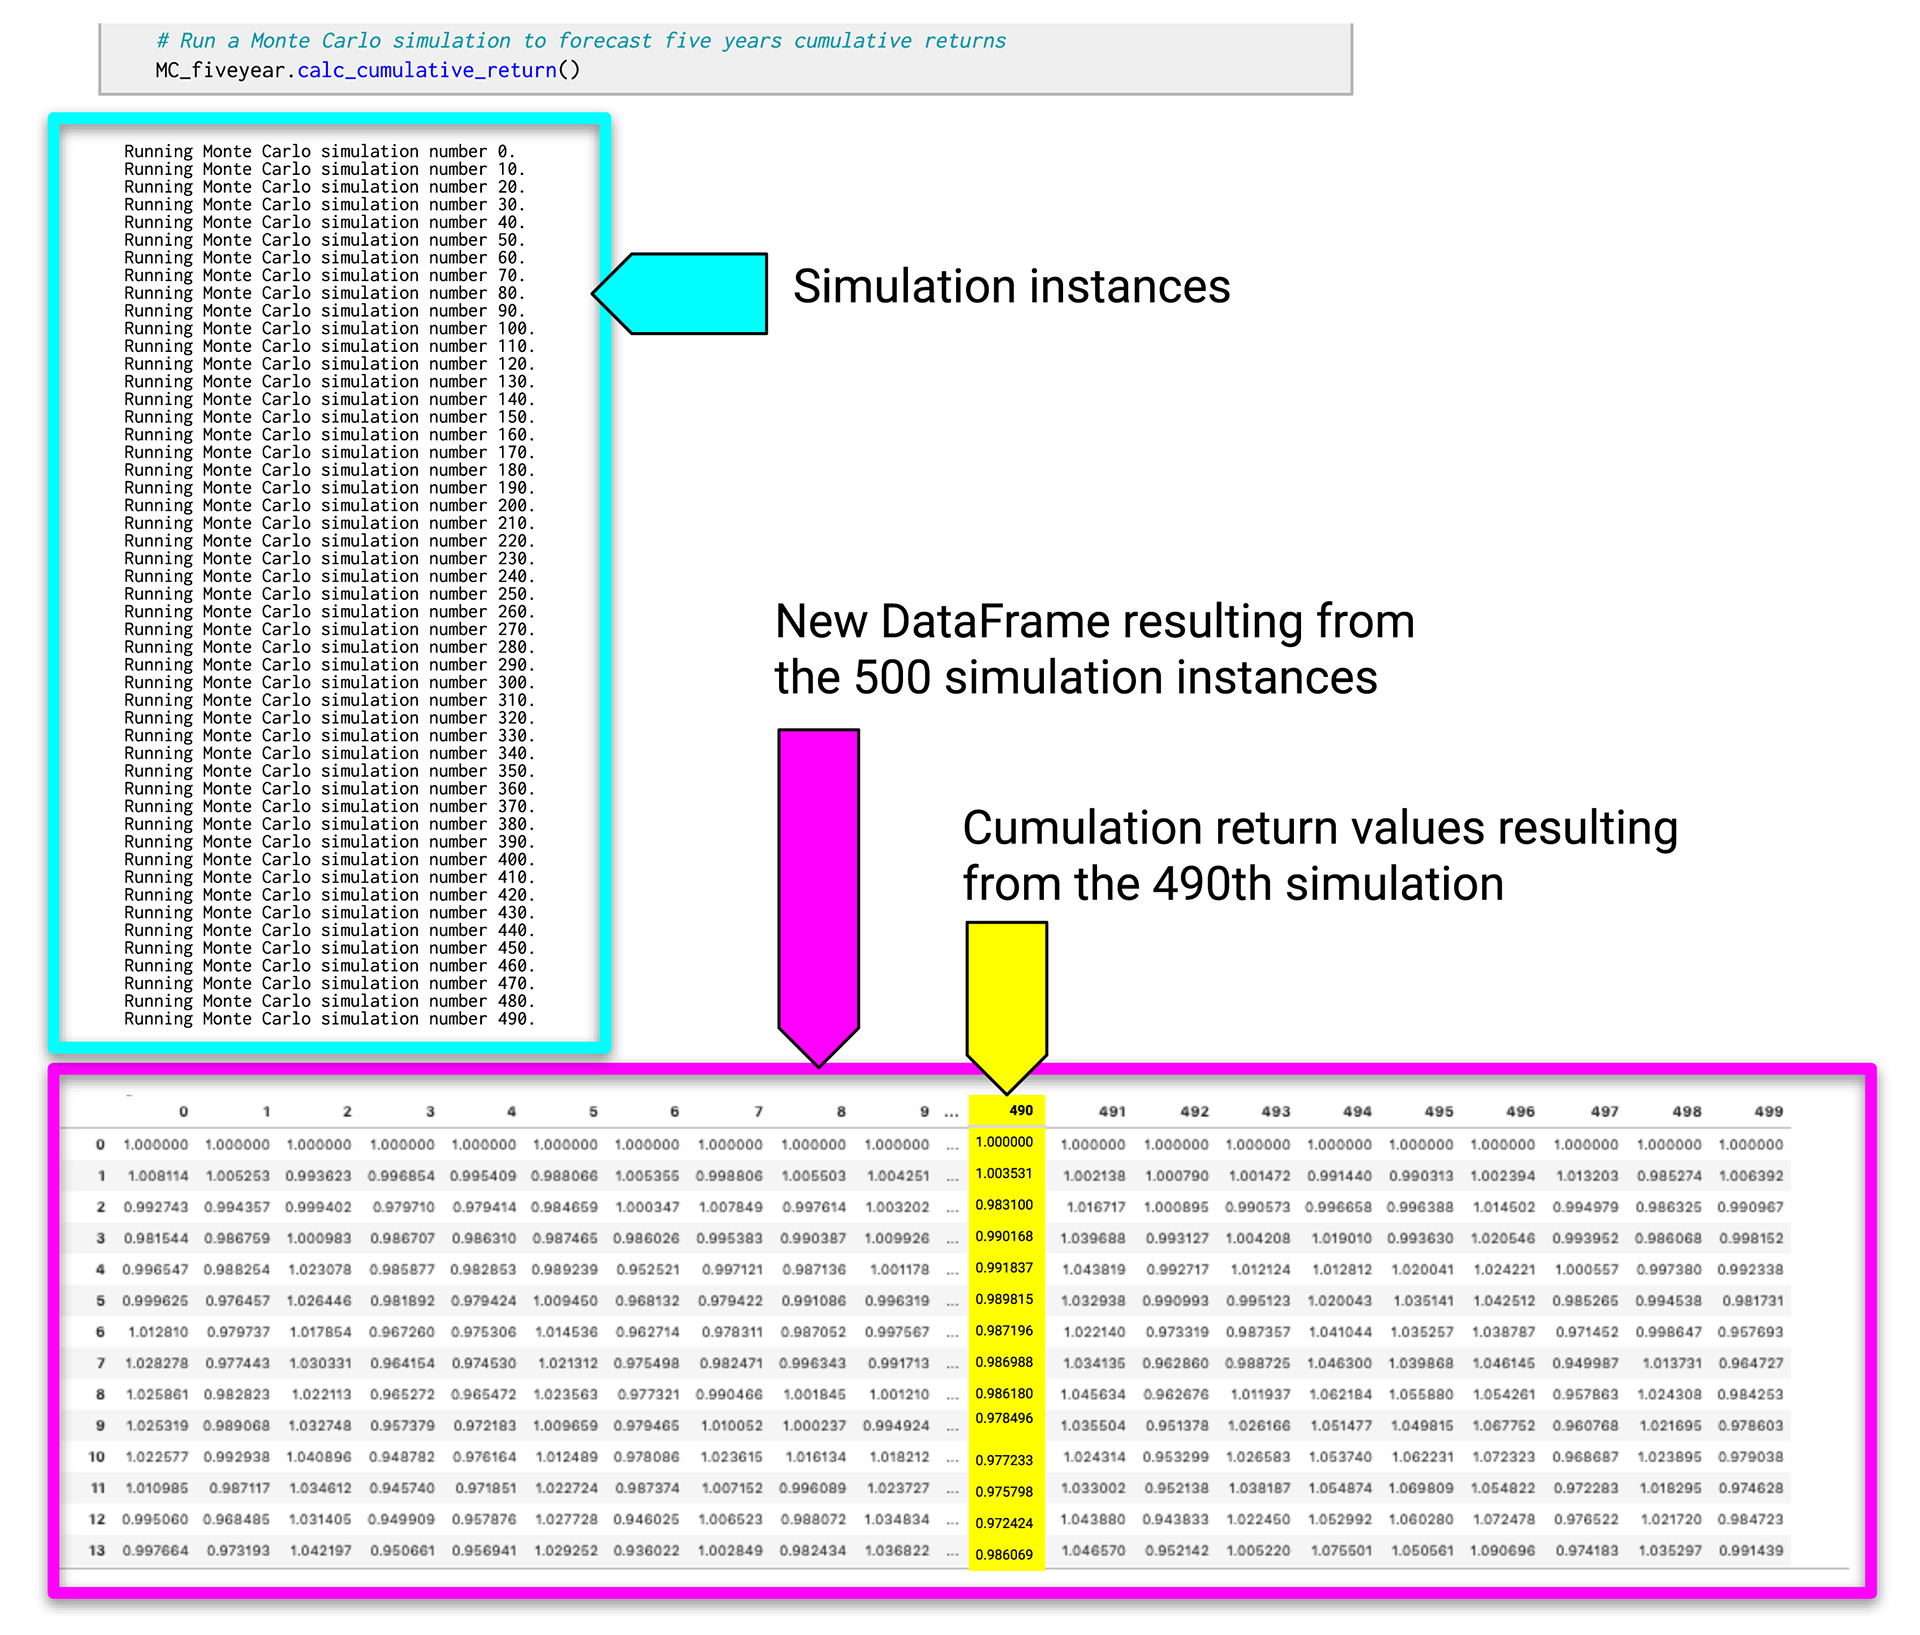

Reviewing the DataFrame, notice that it has 1,261 rows—which represent 252 trading days multiplied by 5 years. And it has 500 columns—which represent the 500 simulated samples. Each column contains the cumulative return values resulting from that simulation. All of this information indicates that the simulation ran correctly!

Now that we ran the simulation, it’s time to interpret the results.

# Plot the Monte Carlo Simulation Results.

To analyze the data that the Monte Carlo simulation generated, we use other built-in functions that the MCSimulation module from MCForecastTools includes.

First, let's review the 500 samples across the entire simulated time frame (that is, five years) by using the

plot_simulation

In [ ]:
# Plot simulation outcomes
MC_sim_line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

Notice that the second step in this code uses the chained functions `get_figure` and `savefig`. The parameters include the name that we want for the image file and bbox_inches="tight". The latter removes all the white space surrounding the notebook visualization from the saved image. With these functions, we can save the plot for future use.

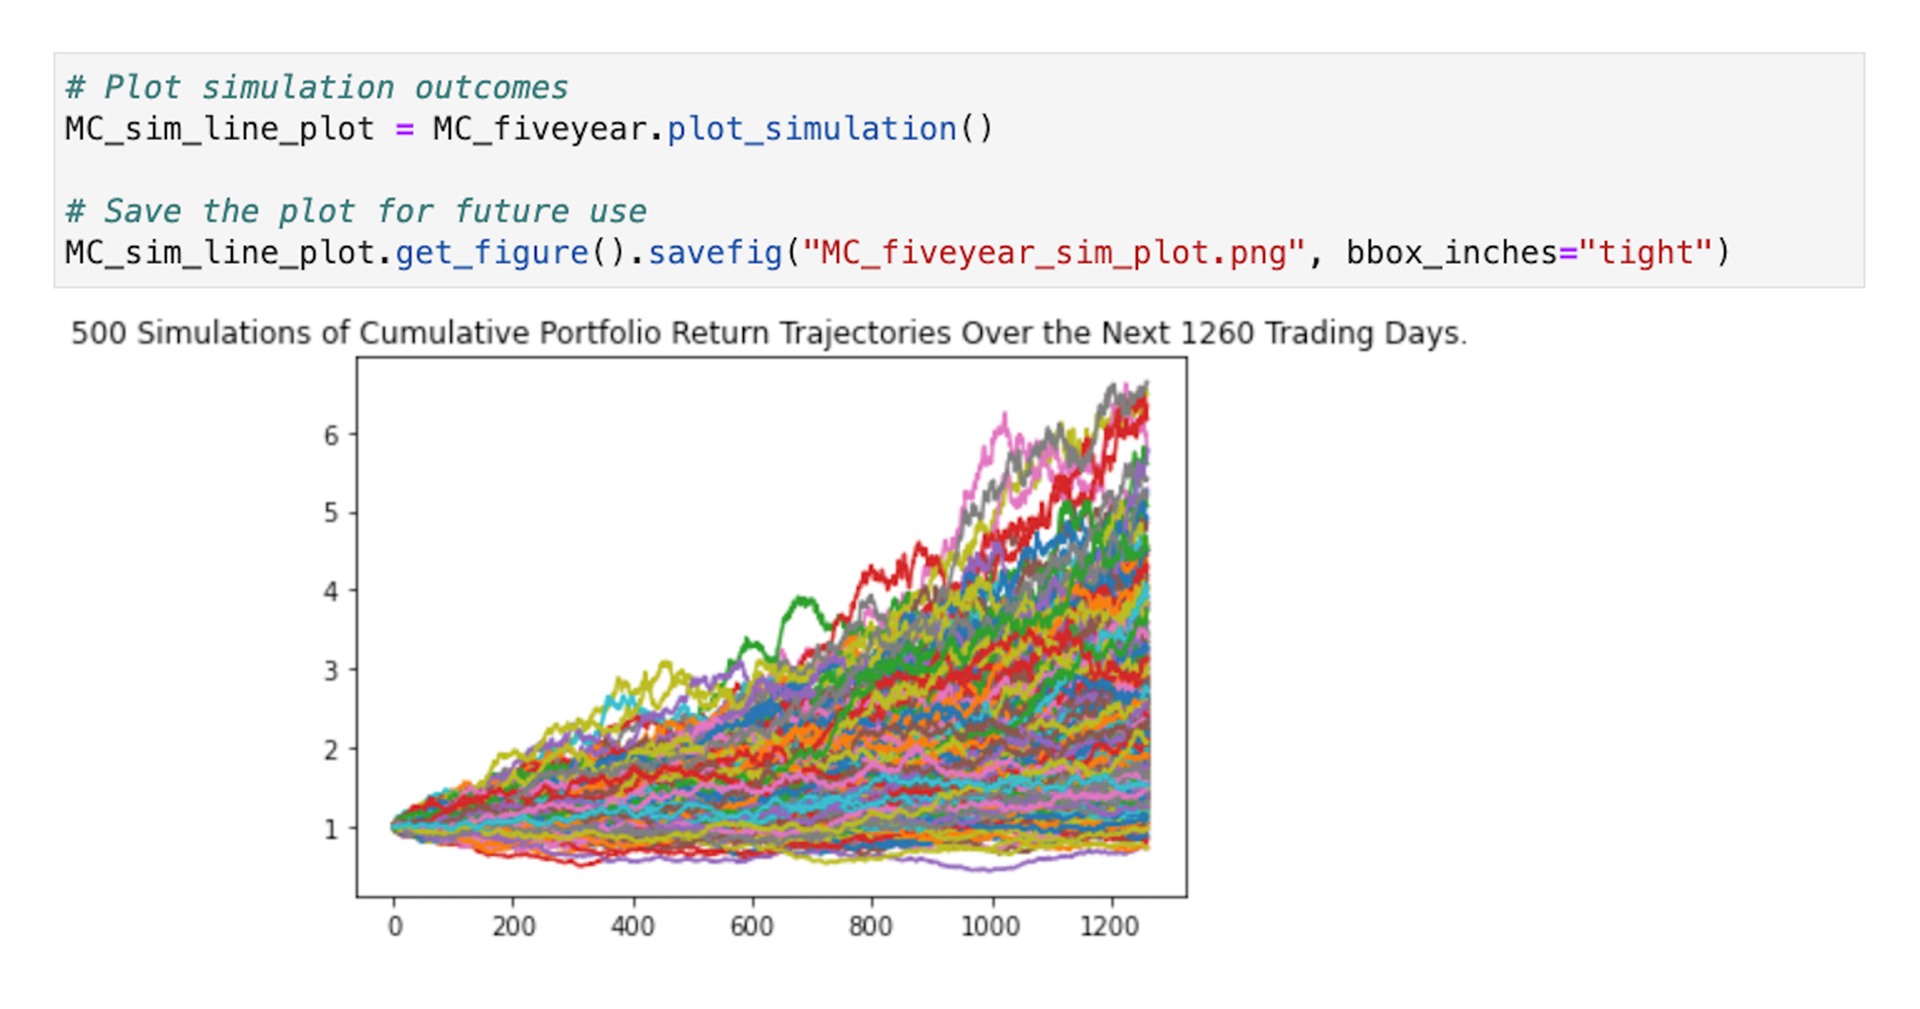

The overlay line plot shows the trajectory of each sample across the 1,260 simulated trading days. The x-axis shows the trading days, and the y-axis shows the cumulative return of the portfolio.

A cumulative return value of 1 indicates that no change in the portfolio value occurred. The plot shows some cumulative return values of 2, 4, or even 6 times the original value. However, it’s difficult to determine the distribution of values from this perspective.

To visualize the distribution of cumulative return values, we’ll create a histogram by using the `plot_distribution` function, as the following code shows:

In [ ]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

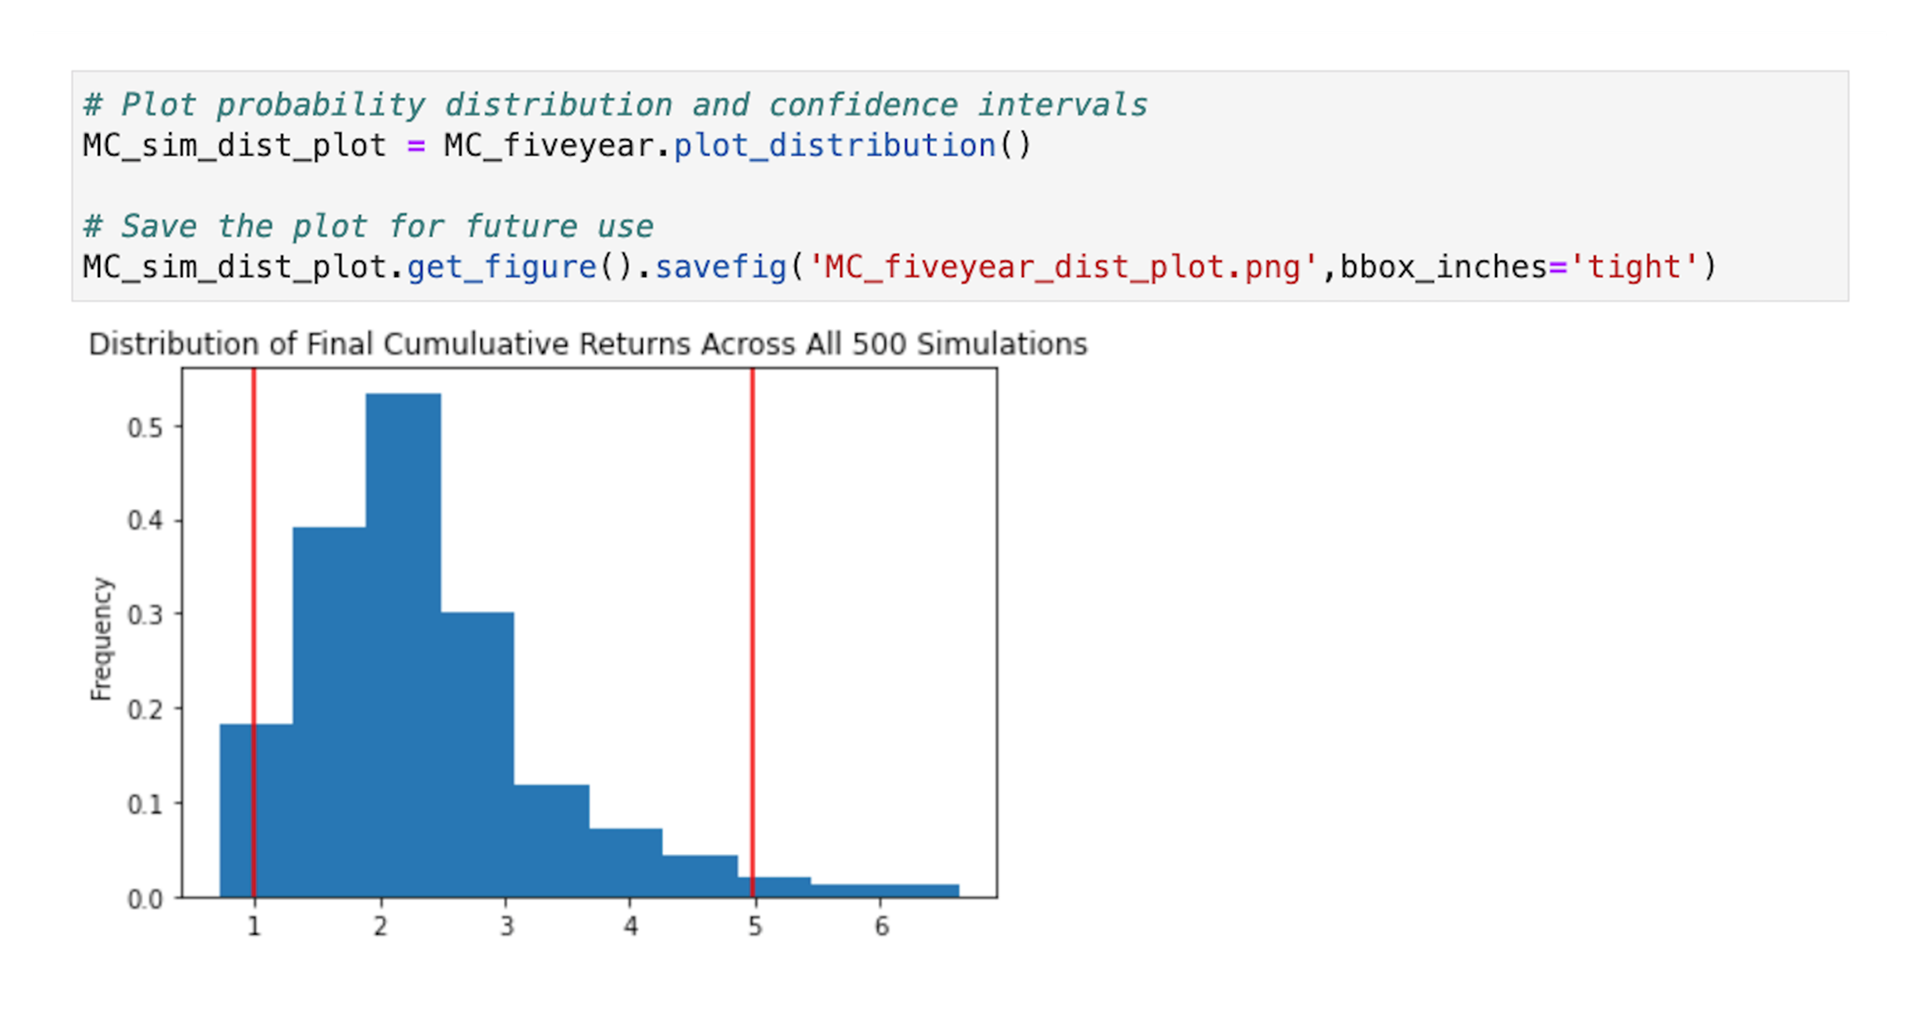

This plot visualizes the final cumulative return values for all 500 simulated samples. The x-axis represents the final cumulative return values. The y-axis represents the frequency of each bin, or how often the simulation calculated each category of cumulative return values. For example, the bin of cumulative return values from 2 to 2.5 occurred the most frequently.

The vertical red lines in the plot visualize the 95% confidence interval. The plot indicates that with a 95% confidence level, we can expect a cumulative return of about 1 to 4.5 times the original investment amount.

### Remember.

The 95% confidence interval illustrates the cumulative returns that we expect to fall within 1.96 standard deviations of the mean. We assume that Monte Carlo simulations will display a normal distribution—especially as the number of simulations that we run increases. The 95% confidence interval therefore approximates that most of the simulated returns will exist in the center of the bell curve rather than at the far tail ends.


# Generate the Summary Statistics

We can also display the summary statistics for the Monte Carlo simulation instance by running the MCSimulation function named
`summarize_cumulative_return`, as the following code snippet shows:

In [ ]:
# Generate summary statistics from the Monte Carlo simulation
# Set the summary statistics equal to a variable for future use
MC_summary_statistics = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics Series
print(MC_summary_statistics)

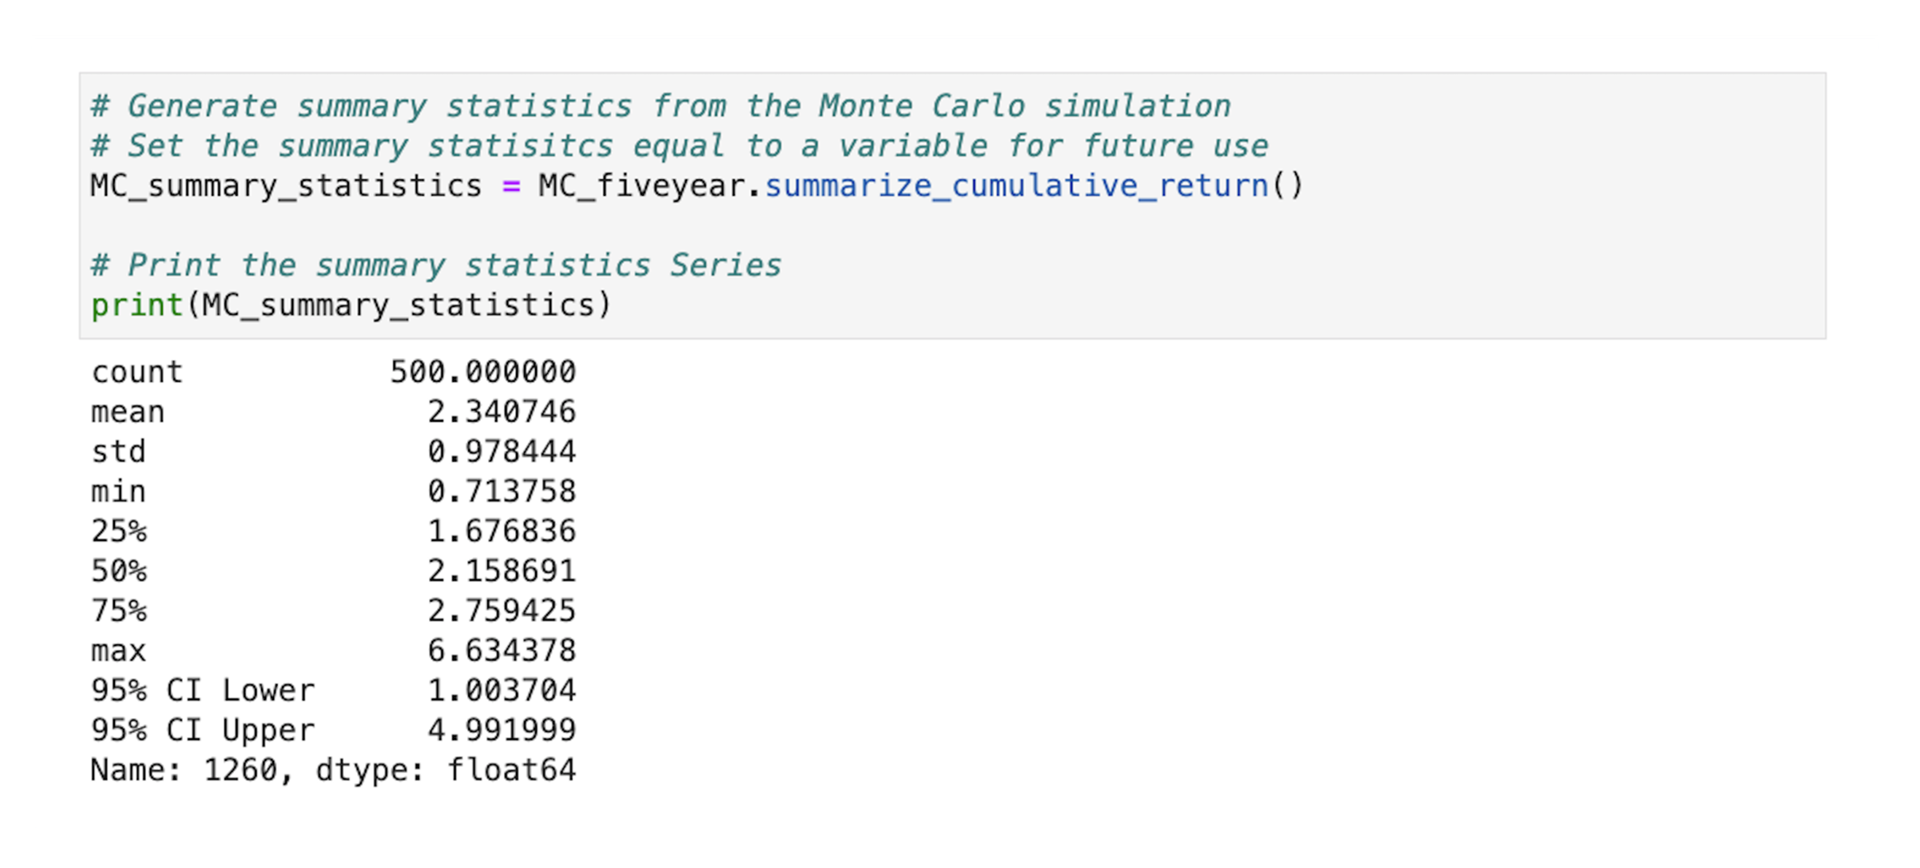

Notice the two new statistics that this Series lists: 95% CI Lower and 95% CI Upper. Given a 95% confidence interval, these values represent the lower and upper bounds of the cumulative performance of the portfolio. We can use these values to calculate the range of possible outcomes from a $10,000 investment in Coca-Cola and Microsoft, as the following code shows:

In [ ]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $10,000 investment
ci_95_lower_cumulative_return = MC_summary_statistics[8] * 10_000
ci_95_upper_cumulative_return = MC_summary_statistics[9] * 10_000


# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
  f" over the next 5 years will end within in the range of"
  f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

This code shows that we calculate ci_95_lower_cumulative_return, which is the lower bound for the cumulative return value with a 95% confidence level, in the following way: we multiply the 95% CI Lower value from the summary statistics, which is MC_summary_stats[8] by the investment value of $10,000.

Similarly, we calculate ci_95_upper_cumulative_return, which is the upper bound for the cumulative return value, in the following way: we multiply the 95% CI Upper value from the summary statistics (MC_summary_stats[9]) by the investment value of $10,000.

The following image shows the result of this code, which states that with a 95% confidence interval, our $10,000 investment will end in the $10,037.04 to $49,919.99 range:

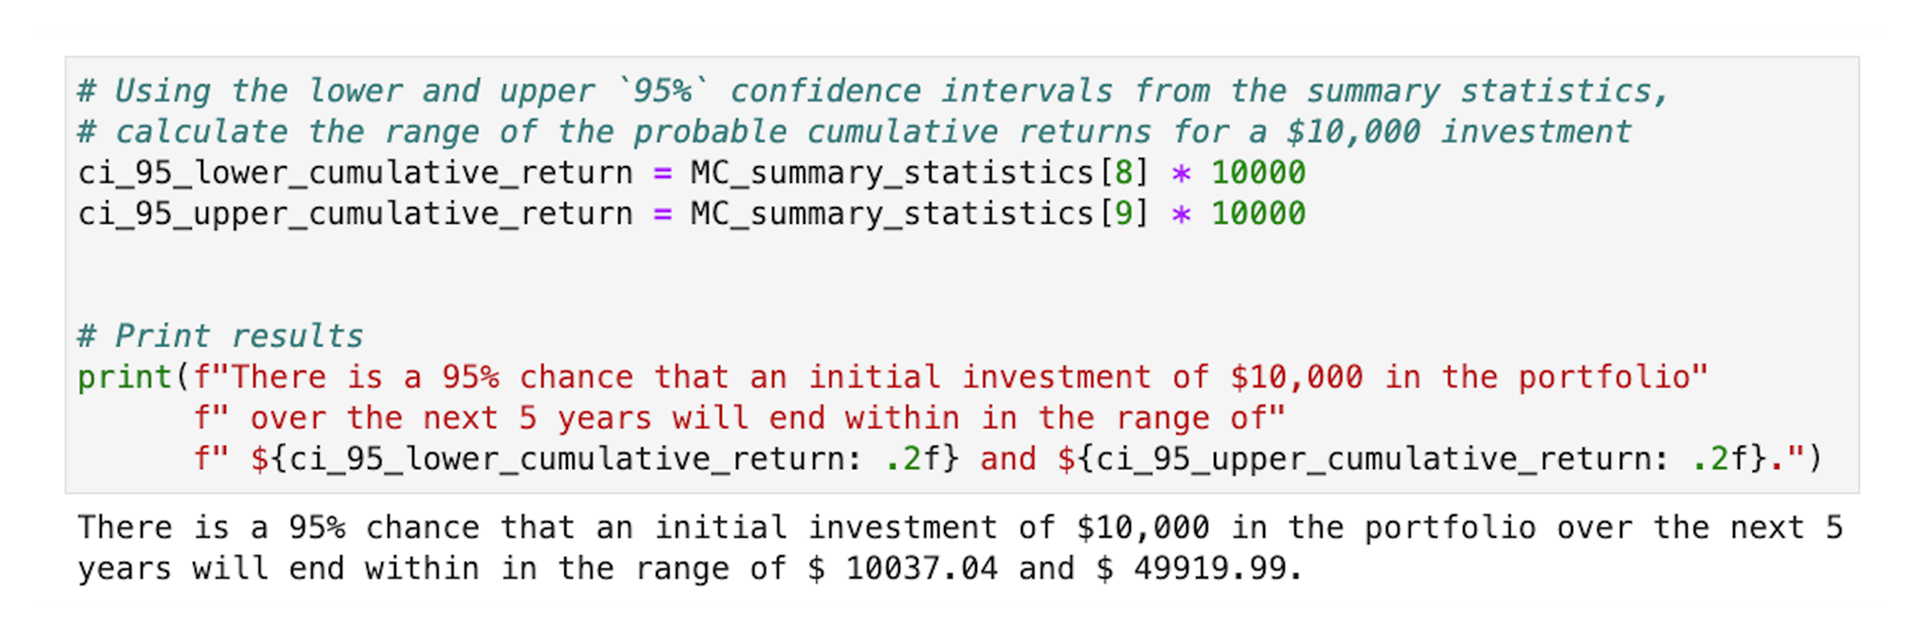

Although this result presents potentially fantastic news, it’s important to note that these five-year forecasted return values are based on only three years of historical price data. The five-year forecast simulates more variability than the data that the simulation is based on includes. In general, it’s ideal to supply one year of historical data for each year of simulated data.

If we simulate using only small amounts of data during a recent time when markets are booming, or instead falling precipitously, a Monte-Carlo Analysis will inadvertently extrapolate this temporary market movement too far into the future. Getting data over a longer time period mitigates this effect. Due to the limitations of the Alpaca API, however, we can typically produce just three full years of historical data.

And with that, we’ve run a Monte Carlo simulation that forecasts the future performance of our investment. But that’s just the beginning for Monte Carlo simulations.

# Adjust the Simulation Parameters

With a few tweaks to our simulation code, we can use the Monte Carlo simulation tool not just to forecast but also to optimize the performance of our investment. Our simulation specified a 60/40 split between the weights of Coca-Cola and Microsoft stock, respectively. How will the forecast for our portfolio change if we change the split to 75/25, 50/50, or 25/75?

By changing the weight of each stock and rerunning the simulation, we can determine which investment split has the greatest potential for generating the largest returns. This process is known as` portfolio optimization.`

We can also use Monte Carlo simulations to forecast the performance of more sizable portfolios. Alpaca gives us access to historical price data for all kinds of assets. And if we can access the data, we can run the simulation.

Portfolio performance forecasting, using tools like Monte Carlo simulations, is the basis of retirement planning across the fintech industry. A wealth manager uses the forecasting tools that their firm supplies to evaluate a client's portfolio and make predictions about the value of that portfolio in the future. These predictions help steer the client's future regarding investments and spending. The wealth manager can also make suggestions about the weights of the assets across the portfolio to meet the client’s future spending expectations. This is called portfolio construction.

In the next activity, you’ll sharpen your portfolio forecasting skills by using Alpaca and Monte Carlo simulations.

#### https://courses.bootcampspot.com/courses/800/pages/5-dot-3-4-activity-three-stock-monte?module_item_id=235201